In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("output/caratPrice.csv")
df.head()

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039


In [3]:
model_1 = CmdStanModel(stan_file='model_1.stan')

INFO:cmdstanpy:compiling stan file E:\Programowanie\Microsoft VS Code Projects\Data Analytics\DA_DiamondModel\model_1.stan to exe file E:\Programowanie\Microsoft VS Code Projects\Data Analytics\DA_DiamondModel\model_1.exe
INFO:cmdstanpy:compiled model executable: E:\Programowanie\Microsoft VS Code Projects\Data Analytics\DA_DiamondModel\model_1.exe


In [4]:
fit = model_1.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(fit.draws_pd())

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -2680.40       0.821082    0.814812          2.0           3.0   
1    -2681.28       0.940914    0.814812          2.0           3.0   
2    -2680.16       1.000000    0.814812          2.0           3.0   
3    -2680.16       0.582836    0.814812          2.0           3.0   
4    -2683.04       0.679148    0.814812          2.0           3.0   
...       ...            ...         ...          ...           ...   
3995 -2680.58       1.000000    0.885359          3.0           7.0   
3996 -2680.16       0.980540    0.885359          2.0           3.0   
3997 -2682.44       0.791100    0.885359          2.0           3.0   
3998 -2680.99       0.998680    0.885359          2.0           7.0   
3999 -2681.03       0.974143    0.885359          3.0           7.0   

      divergent__  energy__    alpha     beta    sigma  ...  y_sim[264]  \
0             0.0   2683.31  196.537  5594.21  1377.22  ...     21612.5

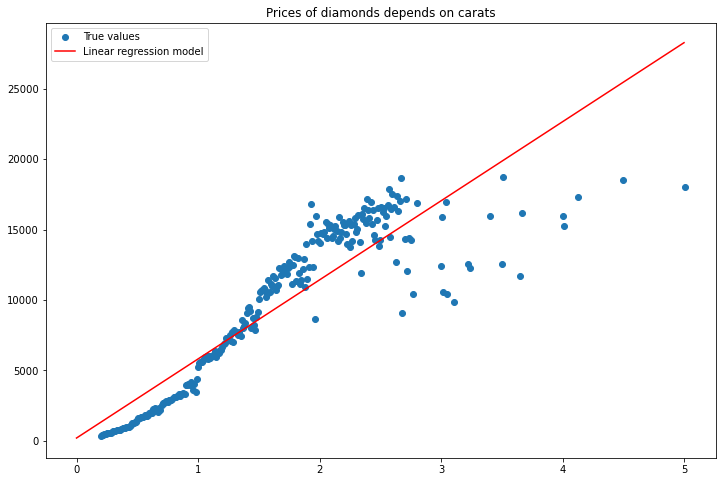

In [5]:
df_alpha = pd.DataFrame(fit.stan_variables()["alpha"])
df_beta = pd.DataFrame(fit.stan_variables()["beta"])
df_sigma = pd.DataFrame(fit.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta = df_beta.mean().to_numpy()
sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta*x

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Linear regression model"])
plt.show()

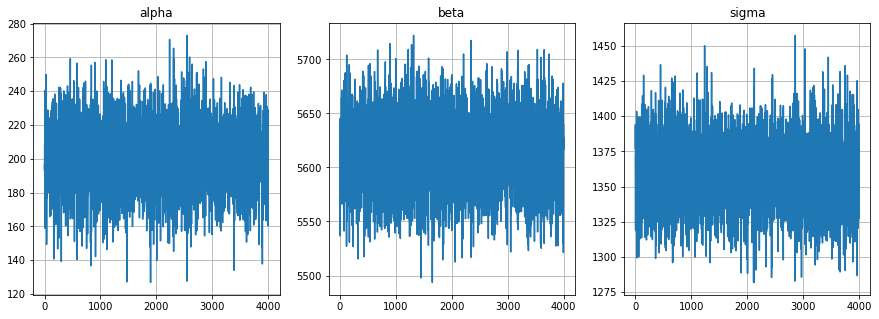

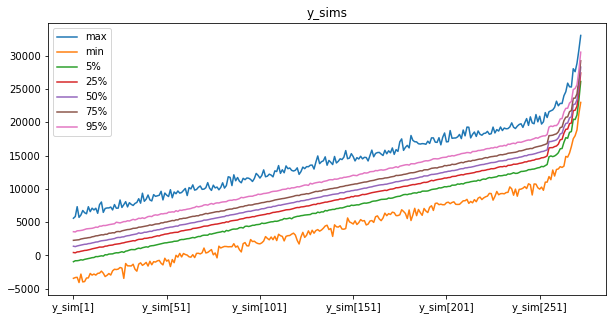

In [6]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axs[0].plot(df_alpha)
axs[0].grid()
axs[0].set_title('alpha')
axs[1].plot(df_beta)
axs[1].grid()
axs[1].set_title('beta')
axs[2].plot(df_sigma)
axs[2].grid()
axs[2].set_title('sigma')
plt.show()

data = fit.draws_pd()
y_sims = data[data.columns[10:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

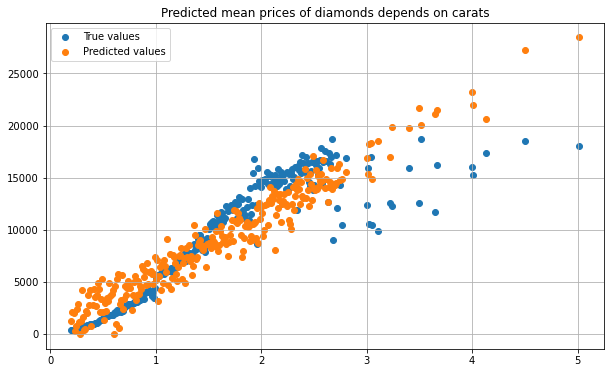

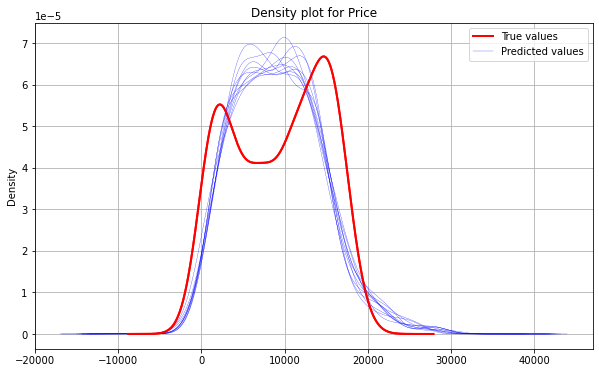

In [7]:
plt.figure(figsize=[10,6])
y_sims_mean = y_sims.mean().to_numpy()
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sims.iloc[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()